Problem Statement "To Uncover Customer Centric Insights: Analyzing Repeat Purchase Patterns in E-commerce"

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/vaishnavi/onedrive_backup/Desktop/Data Science EduTech/Projects/Datasets/website traffic data.csv")
df.head(30)

,user_id,age,gender,country,city,session_id,visit_date,visit_time,landing_page,exit_page,...,clicks,source,device,browser,pageviews,sessions,avg_session_duration,bounce_rate,pages_per_session,conversion_rate
0,1,20,Female,United States,Chicago,1,2024-05-27,20,category,category,...,12,Organic Search,Mobile,Firefox,2,5,1.44,0.32,0.40,0.04
1,2,53,Female,United States,Austin,2,2024-06-15,20,tags/posts,app/search/categories,...,4,Direct,Desktop,Safari,4,3,23.84,0.46,1.33,0.02
2,3,51,Male,United States,Phoenix,3,2024-05-02,1,main/list,search/app/category,...,4,Organic Search,Mobile,Chrome,2,4,21.66,0.36,0.50,0.04
3,4,30,Female,United States,Philadelphia,4,2024-01-15,4,tag/category,categories/app/main,...,12,Referral,Mobile,Firefox,11,6,4.16,0.60,1.83,0.08
4,5,29,Male,United States,Chicago,5,2024-03-23,4,tags,categories,...,20,Organic Search,Tablet,Firefox,4,3,19.73,0.13,1.33,0.04
5,6,28,Female,United States,Columbus,6,2024-05-03,2,app/list/app,search,...,4,Referral,Desktop,Firefox,17,11,29.93,0.19,1.55,0.06
6,7,57,Male,United States,Fort Worth,7,2024-06-06,20,posts/tag,app,...,19,Organic Search,Mobile,Firefox,5,4,8.69,0.12,1.25,0.05
7,8,36,Female,United States,Philadelphia,8,2024-02-01,12,search/blog,wp-content/main,...,15,Referral,Mobile,Edge,2,2,17.26,0.28,1.00,0.05
8,9,52,Female,United States,Austin,9,2024-02-24,22,category,explore/category,...,20,Direct,Desktop,Chrome,6,11,4.56,0.28,0.55,0.08
9,10,38,Female,United States,Phoenix,10,2024-05-30,4,app,posts/search/explore,...,20,Paid Search,Mobile,Firefox,2,5,12.48,0.36,0.40,0.02


In [18]:
df.describe()

,user_id,age,session_id,visit_time,page_load_time,campaign_name,cart_additions,purchases,revenue,time_on_page,scroll_depth,clicks,pageviews,sessions,avg_session_duration,bounce_rate,pages_per_session,conversion_rate
count,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,0.0,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000
mean,17280.500000,41.434057,17280.500000,13.948553,2.994613,NaN,2.495978,1.494965,12.752736,2.749291,49.837963,10.021007,7.723582,6.496296,15.561663,0.399422,1.383639,0.049977
std,9976.756988,13.841195,9976.756988,6.647404,1.150788,NaN,1.703723,1.119332,63.981102,1.291988,29.130528,6.046926,5.833974,4.283669,8.382541,0.244157,0.971185,0.029161
min,1.000000,18.000000,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.200000,0.000000
25%,8640.750000,29.000000,8640.750000,9.000000,2.000000,NaN,1.000000,0.000000,0.000000,1.650000,25.000000,5.000000,3.000000,3.000000,8.280000,0.200000,0.730000,0.030000
50%,17280.500000,41.000000,17280.500000,15.000000,3.000000,NaN,2.000000,1.000000,0.000000,2.750000,50.000000,10.000000,5.000000,5.000000,15.570000,0.390000,1.080000,0.050000
75%,25920.250000,53.000000,25920.250000,20.000000,3.990000,NaN,4.000000,2.000000,0.000000,3.850000,75.000000,15.000000,12.000000,10.000000,22.840000,0.580000,1.730000,0.080000
max,34560.000000,65.000000,34560.000000,23.000000,5.000000,NaN,5.000000,3.000000,499.900000,5.000000,100.000000,20.000000,20.000000,15.000000,30.000000,1.000000,5.000000,0.100000


In [19]:
df.info

<bound method DataFrame.info of        user_id  age  gender        country           city  session_id  \
0            1   20  Female  United States        Chicago           1   
1            2   53  Female  United States         Austin           2   
2            3   51    Male  United States        Phoenix           3   
3            4   30  Female  United States   Philadelphia           4   
4            5   29    Male  United States        Chicago           5   
...        ...  ...     ...            ...            ...         ...   
34555    34556   51  Female  United States     Fort Worth       34556   
34556    34557   18  Female  United States        Chicago       34557   
34557    34558   38  Female  United States         Austin       34558   
34558    34559   20  Female  United States  San Francisco       34559   
34559    34560   58  Female  United States      San Diego       34560   

       visit_date  visit_time                 landing_page  \
0      2024-05-27          20

In [20]:

# Check for missing values
print(df.isnull().sum())

user_id                     0
age                         0
gender                      0
country                     0
city                        0
session_id                  0
visit_date                  0
visit_time                  0
landing_page                0
exit_page                   0
page_load_time              0
event_type                  0
campaign_name           34560
product_viewed              0
product_category            0
cart_additions              0
purchases                   0
revenue                     0
discount_code            8699
referral_url                0
new_vs_returning            0
time_on_page                0
scroll_depth                0
clicks                      0
source                      0
device                      0
browser                     0
pageviews                   0
sessions                    0
avg_session_duration        0
bounce_rate                 0
pages_per_session           0
conversion_rate             0
dtype: int

In [21]:
# Display the columns of the DataFrame
print(df.columns)

# Drop the 'campaign_name' column if it exists
if 'campaign_name' in df.columns:
    print("Column exists in dataset")
    df.drop(columns=['campaign_name'], inplace=True)
else:
    print("Column does not exist")


Index(['user_id', 'age', 'gender', 'country', 'city', 'session_id',
       'visit_date', 'visit_time', 'landing_page', 'exit_page',
       'page_load_time', 'event_type', 'campaign_name', 'product_viewed',
       'product_category', 'cart_additions', 'purchases', 'revenue',
       'discount_code', 'referral_url', 'new_vs_returning', 'time_on_page',
       'scroll_depth', 'clicks', 'source', 'device', 'browser', 'pageviews',
       'sessions', 'avg_session_duration', 'bounce_rate', 'pages_per_session',
       'conversion_rate'],
      dtype='object')
Column exists in dataset


In [23]:
# Fill missing values in 'discount_code' with 'None'
df['discount_code'].fillna('None', inplace=True)

# Verify the changes
print(df['discount_code'].isnull().sum())  # Should print 0 if there are no missing values


0


In [24]:
print(df.isnull().sum())

user_id                 0
age                     0
gender                  0
country                 0
city                    0
session_id              0
visit_date              0
visit_time              0
landing_page            0
exit_page               0
page_load_time          0
event_type              0
product_viewed          0
product_category        0
cart_additions          0
purchases               0
revenue                 0
discount_code           0
referral_url            0
new_vs_returning        0
time_on_page            0
scroll_depth            0
clicks                  0
source                  0
device                  0
browser                 0
pageviews               0
sessions                0
avg_session_duration    0
bounce_rate             0
pages_per_session       0
conversion_rate         0
dtype: int64


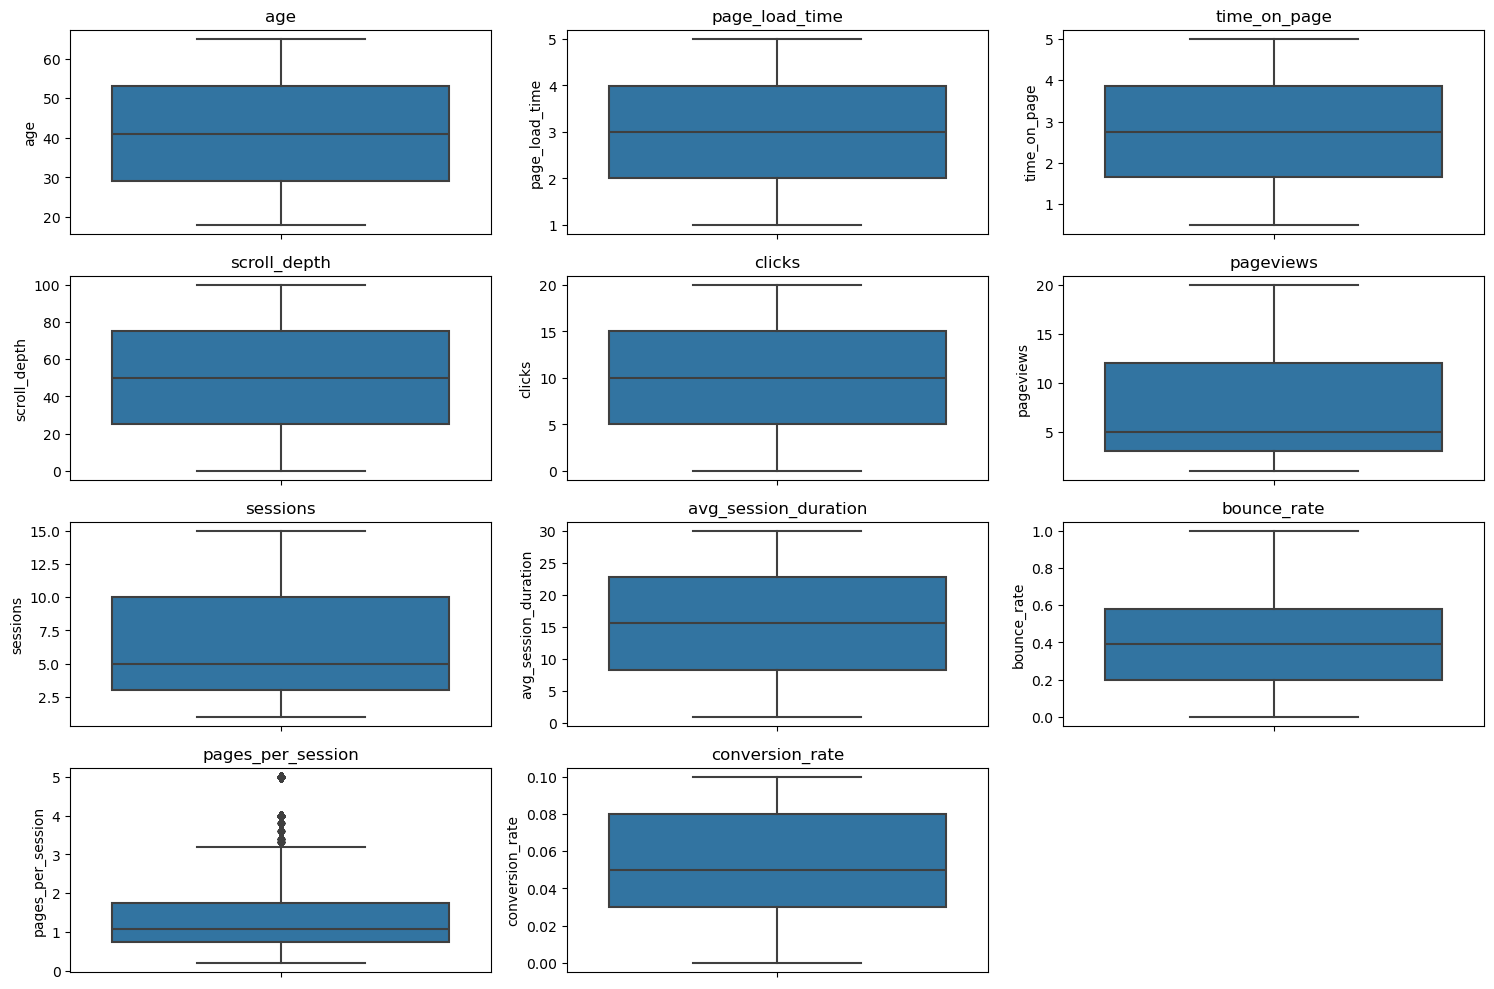

It shows that 'pages_per_session' has outliers


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check for outliers
columns_to_check = ['age', 'page_load_time', 'time_on_page', 'scroll_depth', 'clicks', 'pageviews', 'sessions', 'avg_session_duration', 'bounce_rate', 'pages_per_session', 'conversion_rate']

# Create box plots for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

print("It shows that 'pages_per_session' has outliers")

In [26]:
Q1 = df['pages_per_session'].quantile(0.25)
Q3 = df['pages_per_session'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_filtered = df[(df['pages_per_session'] >= lower_bound) & (df['pages_per_session'] <= upper_bound)]


After Removing Outliers:


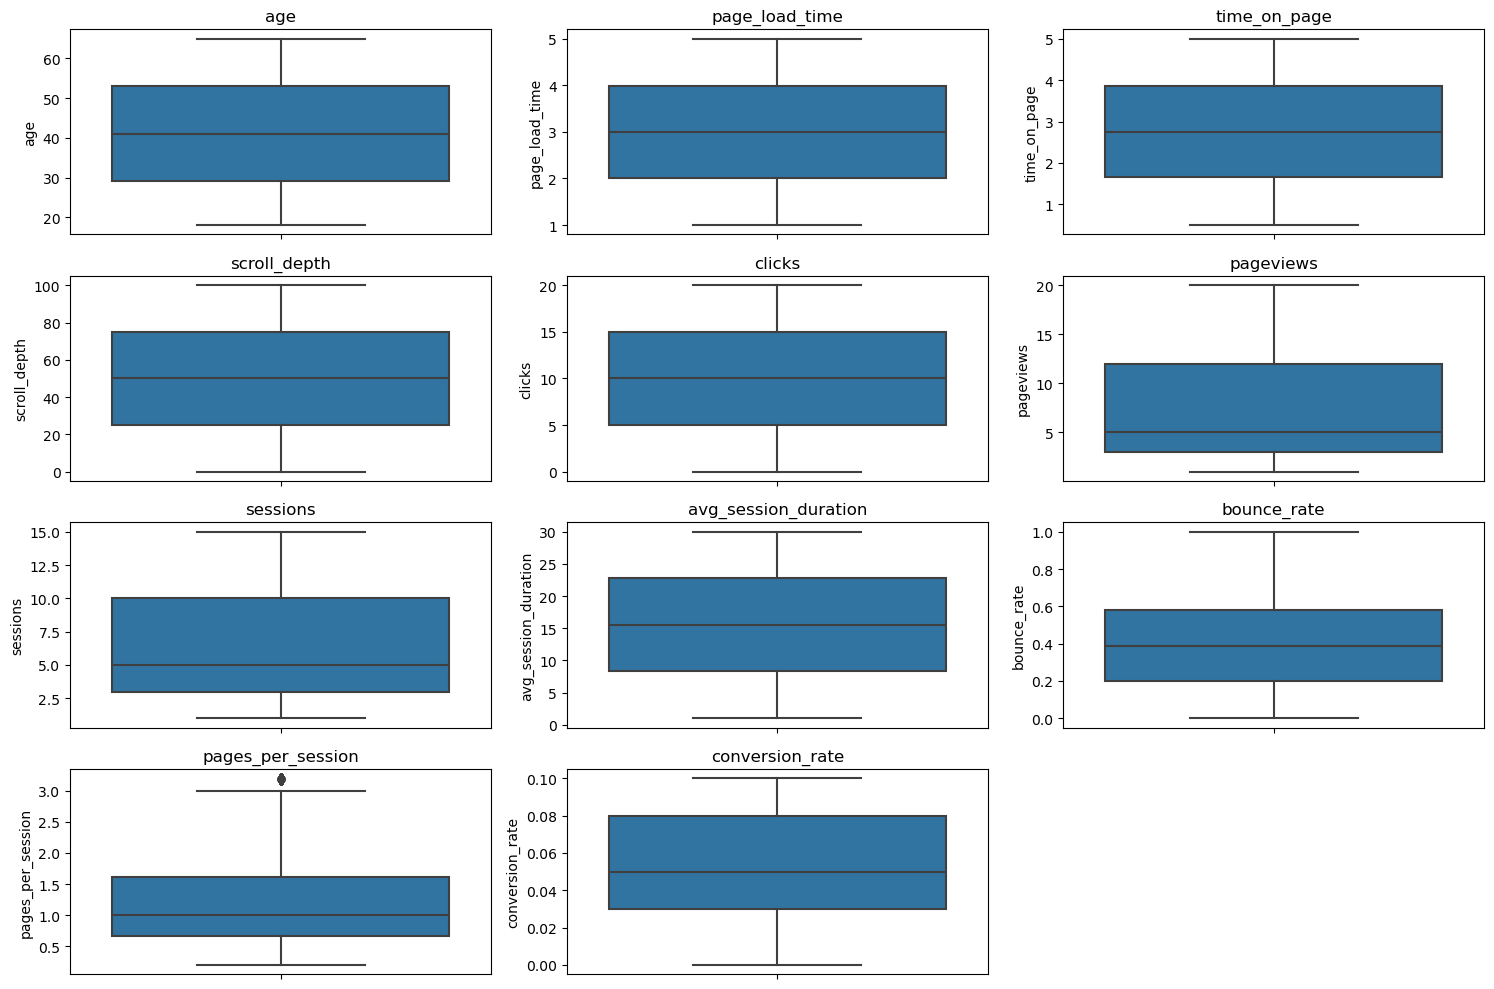

In [27]:
print("After Removing Outliers:")

# Replotting box plots after filtering outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_filtered[column])  # Use df_filtered after outlier removal
    plt.title(column)
plt.tight_layout()
plt.show()


In [29]:
# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("The Categorical Columns in  dataset are:",categorical_columns)
print("The Numerical Columns in dataset are:",numerical_columns)


The Categorical Columns in  dataset are: ['gender', 'country', 'city', 'visit_date', 'landing_page', 'exit_page', 'event_type', 'product_viewed', 'product_category', 'discount_code', 'referral_url', 'new_vs_returning', 'source', 'device', 'browser']
The Numerical Columns in dataset are: ['user_id', 'age', 'session_id', 'visit_time', 'page_load_time', 'cart_additions', 'purchases', 'revenue', 'time_on_page', 'scroll_depth', 'clicks', 'pageviews', 'sessions', 'avg_session_duration', 'bounce_rate', 'pages_per_session', 'conversion_rate']


Data Transformation:

In [30]:
df.shape

(34560, 32)

In [31]:
df

,user_id,age,gender,country,city,session_id,visit_date,visit_time,landing_page,exit_page,...,clicks,source,device,browser,pageviews,sessions,avg_session_duration,bounce_rate,pages_per_session,conversion_rate
0,1,20,Female,United States,Chicago,1,2024-05-27,20,category,category,...,12,Organic Search,Mobile,Firefox,2,5,1.44,0.32,0.40,0.04
1,2,53,Female,United States,Austin,2,2024-06-15,20,tags/posts,app/search/categories,...,4,Direct,Desktop,Safari,4,3,23.84,0.46,1.33,0.02
2,3,51,Male,United States,Phoenix,3,2024-05-02,1,main/list,search/app/category,...,4,Organic Search,Mobile,Chrome,2,4,21.66,0.36,0.50,0.04
3,4,30,Female,United States,Philadelphia,4,2024-01-15,4,tag/category,categories/app/main,...,12,Referral,Mobile,Firefox,11,6,4.16,0.60,1.83,0.08
4,5,29,Male,United States,Chicago,5,2024-03-23,4,tags,categories,...,20,Organic Search,Tablet,Firefox,4,3,19.73,0.13,1.33,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34555,34556,51,Female,United States,Fort Worth,34556,2024-06-03,22,explore/wp-content,category/search,...,1,Email Marketing,Mobile,Safari,12,15,9.46,0.66,0.80,0.09
34556,34557,18,Female,United States,Chicago,34557,2024-06-07,10,app,posts,...,16,Direct,Tablet,Edge,13,9,13.86,0.17,1.44,0.08
34557,34558,38,Female,United States,Austin,34558,2024-04-06,22,wp-content/wp-content/posts,posts/main,...,2,Organic Search,Tablet,Firefox,2,3,19.08,0.68,0.67,0.04
34558,34559,20,Female,United States,San Francisco,34559,2024-02-29,3,explore/tag,wp-content,...,11,Paid Search,Tablet,Edge,3,5,17.33,0.29,0.60,0.04


In [32]:
# Step 1: Identify unique values and their frequencies
unique_countries = df['country'].value_counts().index.tolist()
unique_cities = df['city'].value_counts().index.tolist()

print("The countries in the dataset are:",unique_countries)
print("The cities in the dataset are:",unique_cities)

print("There seems only one country 'United States'")



The countries in the dataset are: ['United States']
The cities in the dataset are: ['Los Angeles', 'Philadelphia', 'San Jose', 'Chicago', 'San Antonio', 'San Francisco', 'Phoenix', 'New York', 'Houston', 'Dallas', 'Jacksonville', 'Columbus', 'San Diego', 'Austin', 'Fort Worth']
There seems only one country 'United States'


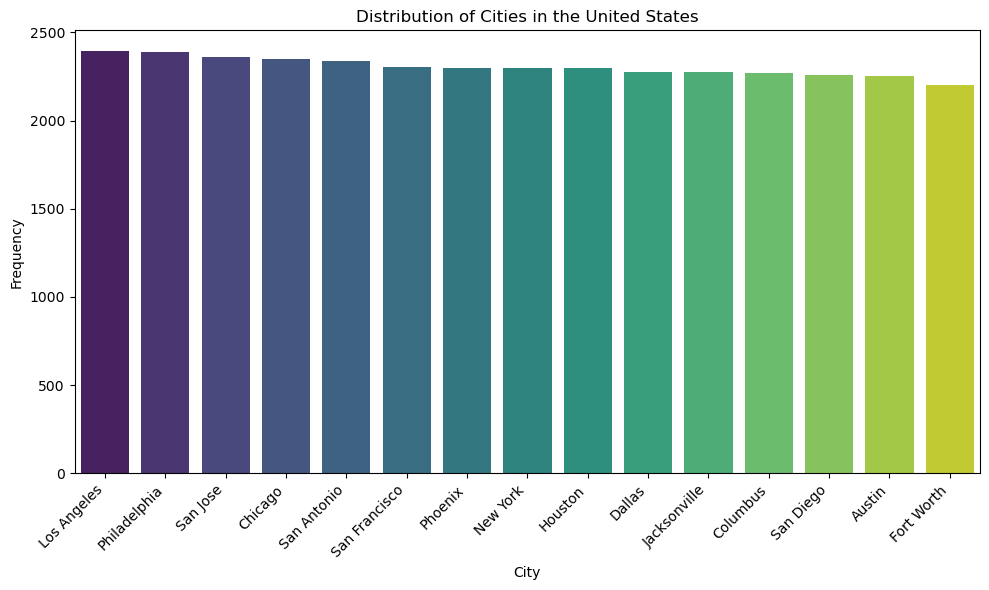

There are total 15 cities


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate city frequencies
city_counts = df['city'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Distribution of Cities in the United States')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("There are total 15 cities")

In [35]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'city', 'session_id',
       'visit_date', 'visit_time', 'landing_page', 'exit_page',
       'page_load_time', 'event_type', 'product_viewed', 'product_category',
       'cart_additions', 'purchases', 'revenue', 'discount_code',
       'referral_url', 'new_vs_returning', 'time_on_page', 'scroll_depth',
       'clicks', 'source', 'device', 'browser', 'pageviews', 'sessions',
       'avg_session_duration', 'bounce_rate', 'pages_per_session',
       'conversion_rate', 'region'],
      dtype='object')

In [37]:

# Define a function to classify cities into regions
def classify_city(city):
    if city in ['Chicago', 'Philadelphia', 'New York', 'Columbus']:
        return 'North_usa'
    elif city in ['Houston', 'Dallas', 'Jacksonville']:
        return 'South_usa'
    elif city in ['Los Angeles', 'San Jose', 'San Francisco', 'Phoenix', 'San Diego']:
        return 'West_usa'
    elif city in ['Austin', 'Fort Worth']:
        return 'East_usa'
    else:
        return 'Other'

# Apply the classification function to create a new 'region' column
df['region'] = df['city'].apply(classify_city)

# Create indicator columns based on 'region'
df['North_usa'] = df['region'].apply(lambda x: 1 if x == 'North_usa' else 0)
df['South_usa'] = df['region'].apply(lambda x: 1 if x == 'South_usa' else 0)
df['West_usa'] = df['region'].apply(lambda x: 1 if x == 'West_usa' else 0)
df['East_usa'] = df['region'].apply(lambda x: 1 if x == 'East_usa' else 0)

print(df)

       user_id  age  gender        country           city  session_id  \
0            1   20  Female  United States        Chicago           1   
1            2   53  Female  United States         Austin           2   
2            3   51    Male  United States        Phoenix           3   
3            4   30  Female  United States   Philadelphia           4   
4            5   29    Male  United States        Chicago           5   
...        ...  ...     ...            ...            ...         ...   
34555    34556   51  Female  United States     Fort Worth       34556   
34556    34557   18  Female  United States        Chicago       34557   
34557    34558   38  Female  United States         Austin       34558   
34558    34559   20  Female  United States  San Francisco       34559   
34559    34560   58  Female  United States      San Diego       34560   

       visit_date  visit_time                 landing_page  \
0      2024-05-27          20                     category   

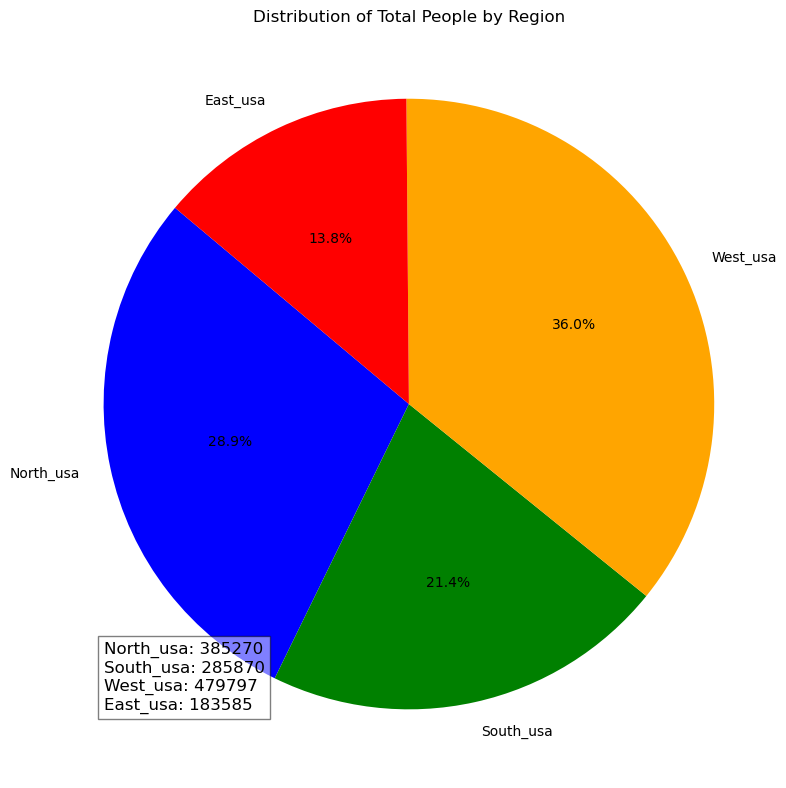

In [38]:
import matplotlib.pyplot as plt



# Data for pie chart
regions = ['North_usa', 'South_usa', 'West_usa', 'East_usa']
totals = [385270, 285870, 479797, 183585]

# Calculate percentages
percentages = [(total / sum(totals)) * 100 for total in totals]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(totals, labels=regions, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'orange', 'red'])

# Add total values as text
total_str = [f'{region}: {total}' for region, total in zip(regions, totals)]
plt.text(-1, -1, '\n'.join(total_str), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('Distribution of Total People by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


This shows that regions west and north have the most customers

In [39]:
# Assuming df is your DataFrame
df['gender_encoded'] = df['gender'].replace({'Male': 1, 'Female': 0})

# Display the first few rows to verify
df.head()


,user_id,age,gender,country,city,session_id,visit_date,visit_time,landing_page,exit_page,...,avg_session_duration,bounce_rate,pages_per_session,conversion_rate,region,North_usa,South_usa,West_usa,East_usa,gender_encoded
0,1,20,Female,United States,Chicago,1,2024-05-27,20,category,category,...,1.44,0.32,0.40,0.04,North_usa,1,0,0,0,0
1,2,53,Female,United States,Austin,2,2024-06-15,20,tags/posts,app/search/categories,...,23.84,0.46,1.33,0.02,East_usa,0,0,0,1,0
2,3,51,Male,United States,Phoenix,3,2024-05-02,1,main/list,search/app/category,...,21.66,0.36,0.50,0.04,West_usa,0,0,1,0,1
3,4,30,Female,United States,Philadelphia,4,2024-01-15,4,tag/category,categories/app/main,...,4.16,0.60,1.83,0.08,North_usa,1,0,0,0,0
4,5,29,Male,United States,Chicago,5,2024-03-23,4,tags,categories,...,19.73,0.13,1.33,0.04,North_usa,1,0,0,0,1


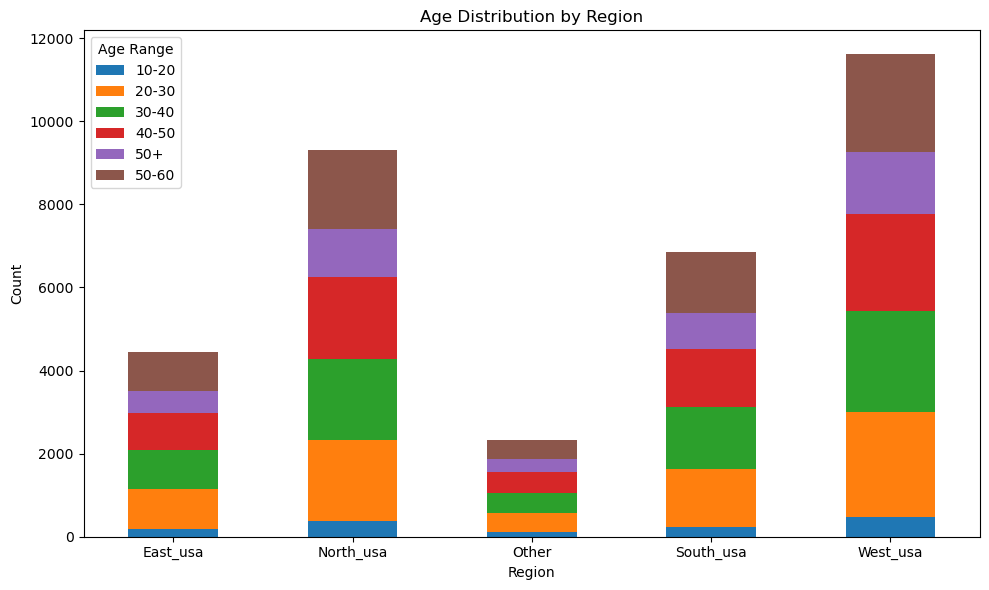

In [40]:


# Define age ranges
age_ranges = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60)]  # Define as needed

# Function to categorize age into ranges
def categorize_age(age):
    for start, end in age_ranges:
        if start <= age < end:
            return f'{start}-{end}'
    return f'{age_ranges[-1][0]}+'

# Apply categorization to DataFrame
df['age_range'] = df['age'].apply(categorize_age)

# Group by region and age range
grouped = df.groupby(['region', 'age_range']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Age Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Age Range')

plt.tight_layout()
plt.show()



In [41]:
# Function to categorize age into ranges
def categorize_age(age):
    for start, end in age_ranges:
        if start <= age < end:
            return f'{start}-{end}'
    return f'{age_ranges[-1][0]}+'

# Apply categorization to DataFrame
df['age_range'] = df['age'].apply(categorize_age)

# Group by region and age range
grouped = df.groupby(['region', 'age_range']).size().unstack(fill_value=0)

# Print number of customers in each age group within each region
for region in grouped.index:
    print(f"Region: {region}")
    
    # Print number of customers in each age group
    for age_range, count in zip(grouped.columns, grouped.loc[region]):
        print(f"Age range {age_range}: {count} customers")
    
    # Determine age group with the most customers
    max_age_group = grouped.loc[region].idxmax()
    max_count = grouped.loc[region].max()
    print(f"Age group with most customers: {max_age_group} ({max_count} customers)")
    
    print()  # Blank line for separation between regions

Region: East_usa
Age range 10-20: 183 customers
Age range 20-30: 969 customers
Age range 30-40: 927 customers
Age range 40-50: 897 customers
Age range 50+: 539 customers
Age range 50-60: 939 customers
Age group with most customers: 20-30 (969 customers)

Region: North_usa
Age range 10-20: 382 customers
Age range 20-30: 1948 customers
Age range 30-40: 1944 customers
Age range 40-50: 1981 customers
Age range 50+: 1146 customers
Age range 50-60: 1904 customers
Age group with most customers: 40-50 (1981 customers)

Region: Other
Age range 10-20: 103 customers
Age range 20-30: 462 customers
Age range 30-40: 496 customers
Age range 40-50: 495 customers
Age range 50+: 307 customers
Age range 50-60: 474 customers
Age group with most customers: 30-40 (496 customers)

Region: South_usa
Age range 10-20: 233 customers
Age range 20-30: 1403 customers
Age range 30-40: 1476 customers
Age range 40-50: 1409 customers
Age range 50+: 855 customers
Age range 50-60: 1474 customers
Age group with most custo

Now let us focus on West_usa and North_usa which have most customers and have age groups 20-30 and 40-50.

Both these age groups are very different in terms of interests and needs, we need to find those for better analysis.


In [42]:
df

,user_id,age,gender,country,city,session_id,visit_date,visit_time,landing_page,exit_page,...,bounce_rate,pages_per_session,conversion_rate,region,North_usa,South_usa,West_usa,East_usa,gender_encoded,age_range
0,1,20,Female,United States,Chicago,1,2024-05-27,20,category,category,...,0.32,0.40,0.04,North_usa,1,0,0,0,0,20-30
1,2,53,Female,United States,Austin,2,2024-06-15,20,tags/posts,app/search/categories,...,0.46,1.33,0.02,East_usa,0,0,0,1,0,50-60
2,3,51,Male,United States,Phoenix,3,2024-05-02,1,main/list,search/app/category,...,0.36,0.50,0.04,West_usa,0,0,1,0,1,50-60
3,4,30,Female,United States,Philadelphia,4,2024-01-15,4,tag/category,categories/app/main,...,0.60,1.83,0.08,North_usa,1,0,0,0,0,30-40
4,5,29,Male,United States,Chicago,5,2024-03-23,4,tags,categories,...,0.13,1.33,0.04,North_usa,1,0,0,0,1,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34555,34556,51,Female,United States,Fort Worth,34556,2024-06-03,22,explore/wp-content,category/search,...,0.66,0.80,0.09,East_usa,0,0,0,1,0,50-60
34556,34557,18,Female,United States,Chicago,34557,2024-06-07,10,app,posts,...,0.17,1.44,0.08,North_usa,1,0,0,0,0,10-20
34557,34558,38,Female,United States,Austin,34558,2024-04-06,22,wp-content/wp-content/posts,posts/main,...,0.68,0.67,0.04,East_usa,0,0,0,1,0,30-40
34558,34559,20,Female,United States,San Francisco,34559,2024-02-29,3,explore/tag,wp-content,...,0.29,0.60,0.04,West_usa,0,0,1,0,0,20-30


C:\Users\vaishnavi\AppData\Local\Temp\ipykernel_35952\511821705.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_data.groupby(['region', pd.cut(filtered_data['age'], [age_range_west[0], age_range_west[1]+1, age_range_north[1]+1], labels=['20-30', '40-50']), 'gender']).size().unstack(fill_value=0)


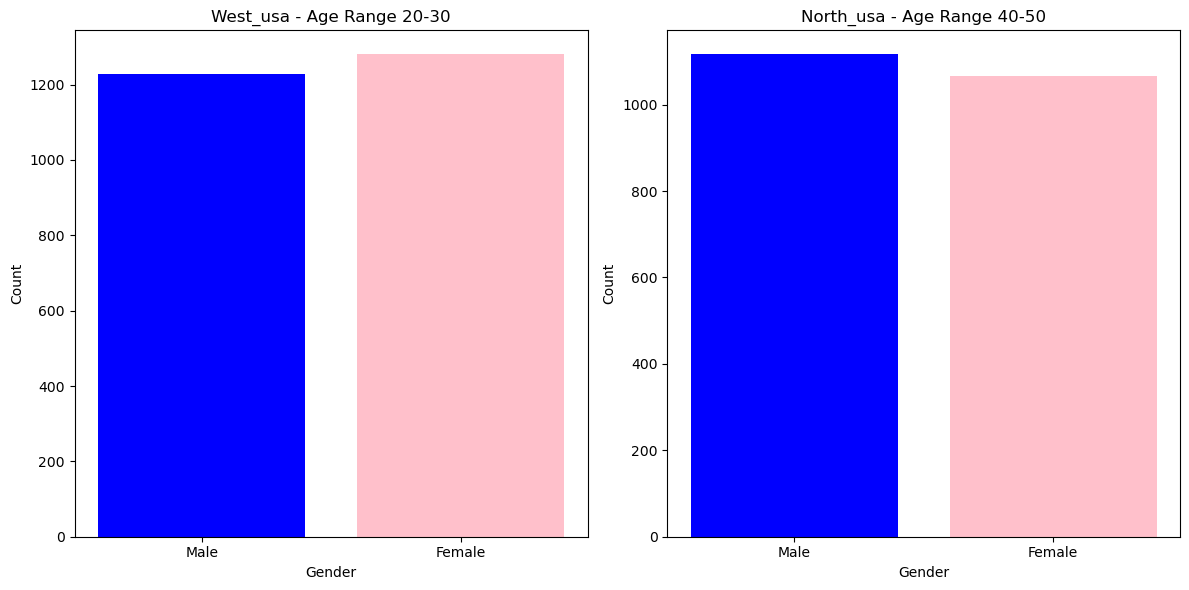

West_usa - Age Range 20-30: Male Count - 1227, Female Count - 1280
West_usa - Age Range 40-50: Male Count - 0, Female Count - 0
North_usa - Age Range 20-30: Male Count - 0, Female Count - 0
North_usa - Age Range 40-50: Male Count - 1116, Female Count - 1066


In [43]:

# Define specific age ranges for West_usa and North_usa
age_range_west = (20, 30)  # Age range for West_usa
age_range_north = (40, 50)  # Age range for North_usa

# Filter data for West_usa (age 20-30) and North_usa (age 40-50)
filtered_data = df[((df['region'] == 'West_usa') & (df['age'] >= age_range_west[0]) & (df['age'] <= age_range_west[1])) |
                   ((df['region'] == 'North_usa') & (df['age'] >= age_range_north[0]) & (df['age'] <= age_range_north[1]))]

# Group by region, age, and gender to count customers
grouped = filtered_data.groupby(['region', pd.cut(filtered_data['age'], [age_range_west[0], age_range_west[1]+1, age_range_north[1]+1], labels=['20-30', '40-50']), 'gender']).size().unstack(fill_value=0)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

regions = ['West_usa', 'North_usa']
age_ranges = ['20-30', '40-50']
genders = ['Male', 'Female']

# Iterate over each region and plot
for i, region in enumerate(regions):
    ax = axes[i]
    # Extract data for the current region and age range
    if region == 'West_usa':
        age_range = '20-30'
    elif region == 'North_usa':
        age_range = '40-50'
    
    if age_range in grouped.loc[region].index:
        counts = grouped.loc[(region, age_range), genders]
    else:
        counts = [0, 0]
    
    # Plot bar chart
    ax.bar(genders, counts, color=['blue', 'pink'])
    ax.set_title(f'{region} - Age Range {age_range}')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


male_counts = []
female_counts = []

regions = ['West_usa', 'North_usa']
age_ranges = ['20-30', '40-50']
genders = ['Male', 'Female']

# Iterate over each region and age range to get counts
for region in regions:
    for age_range in age_ranges:
        if age_range in grouped.loc[region].index:
            male_count = grouped.loc[(region, age_range), 'Male']
            female_count = grouped.loc[(region, age_range), 'Female']
        else:
            male_count = 0
            female_count = 0
        male_counts.append(male_count)
        female_counts.append(female_count)

# Print the counts of males and females for each region and age range
for i, region in enumerate(regions):
    for j, age_range in enumerate(age_ranges):
        print(f"{region} - Age Range {age_range}: Male Count - {male_counts[i*len(age_ranges) + j]}, Female Count - {female_counts[i*len(age_ranges) + j]}")

In [44]:
df

,user_id,age,gender,country,city,session_id,visit_date,visit_time,landing_page,exit_page,...,bounce_rate,pages_per_session,conversion_rate,region,North_usa,South_usa,West_usa,East_usa,gender_encoded,age_range
0,1,20,Female,United States,Chicago,1,2024-05-27,20,category,category,...,0.32,0.40,0.04,North_usa,1,0,0,0,0,20-30
1,2,53,Female,United States,Austin,2,2024-06-15,20,tags/posts,app/search/categories,...,0.46,1.33,0.02,East_usa,0,0,0,1,0,50-60
2,3,51,Male,United States,Phoenix,3,2024-05-02,1,main/list,search/app/category,...,0.36,0.50,0.04,West_usa,0,0,1,0,1,50-60
3,4,30,Female,United States,Philadelphia,4,2024-01-15,4,tag/category,categories/app/main,...,0.60,1.83,0.08,North_usa,1,0,0,0,0,30-40
4,5,29,Male,United States,Chicago,5,2024-03-23,4,tags,categories,...,0.13,1.33,0.04,North_usa,1,0,0,0,1,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34555,34556,51,Female,United States,Fort Worth,34556,2024-06-03,22,explore/wp-content,category/search,...,0.66,0.80,0.09,East_usa,0,0,0,1,0,50-60
34556,34557,18,Female,United States,Chicago,34557,2024-06-07,10,app,posts,...,0.17,1.44,0.08,North_usa,1,0,0,0,0,10-20
34557,34558,38,Female,United States,Austin,34558,2024-04-06,22,wp-content/wp-content/posts,posts/main,...,0.68,0.67,0.04,East_usa,0,0,0,1,0,30-40
34558,34559,20,Female,United States,San Francisco,34559,2024-02-29,3,explore/tag,wp-content,...,0.29,0.60,0.04,West_usa,0,0,1,0,0,20-30


In [45]:
l1 = df['landing_page'].unique()
l2 = df['exit_page'].unique()
print("The unique items in the landing page:", l1,"and exit page are:", l2)

The unique items in the landing page: ['category' 'tags/posts' 'main/list' ... 'category/tags/posts'
 'list/blog/blog' 'tags/search/posts'] and exit page are: ['category' 'app/search/categories' 'search/app/category' ...
 'list/search/tag' 'wp-content/category/search' 'tags/main/main']


These are the unique landing and exiting pages found in the dataset

In [46]:
import pandas as pd



# Define filters
filters = (
    ((df['region'] == 'West_usa') & (df['age_range'] == '20-30')) | 
    ((df['region'] == 'North_usa') & (df['age_range'] == '40-50'))
)

# Apply filters
data_new = df[filters]

# Display first few rows of data_new to verify
print(data_new.head())


    user_id  age  gender        country           city  session_id  \
17       18   47  Female  United States       Columbus          18   
20       21   29  Female  United States  San Francisco          21   
30       31   24    Male  United States  San Francisco          31   
56       57   23    Male  United States      San Diego          57   
61       62   45  Female  United States       Columbus          62   

    visit_date  visit_time            landing_page               exit_page  \
17  2024-06-10           1             explore/tag            explore/tags   
20  2024-03-10           9     tags/wp-content/app  explore/category/posts   
30  2024-03-02          18  main/search/wp-content                main/app   
56  2024-02-15          17                     app  categories/search/tags   
61  2024-05-15           5                     app        search/tags/blog   

    ...  bounce_rate pages_per_session conversion_rate     region  North_usa  \
17  ...         0.08          

In [47]:
data_new.columns

Index(['user_id', 'age', 'gender', 'country', 'city', 'session_id',
       'visit_date', 'visit_time', 'landing_page', 'exit_page',
       'page_load_time', 'event_type', 'product_viewed', 'product_category',
       'cart_additions', 'purchases', 'revenue', 'discount_code',
       'referral_url', 'new_vs_returning', 'time_on_page', 'scroll_depth',
       'clicks', 'source', 'device', 'browser', 'pageviews', 'sessions',
       'avg_session_duration', 'bounce_rate', 'pages_per_session',
       'conversion_rate', 'region', 'North_usa', 'South_usa', 'West_usa',
       'East_usa', 'gender_encoded', 'age_range'],
      dtype='object')

In [48]:
data_new.info

<bound method DataFrame.info of        user_id  age  gender        country           city  session_id  \
17          18   47  Female  United States       Columbus          18   
20          21   29  Female  United States  San Francisco          21   
30          31   24    Male  United States  San Francisco          31   
56          57   23    Male  United States      San Diego          57   
61          62   45  Female  United States       Columbus          62   
...        ...  ...     ...            ...            ...         ...   
34532    34533   41  Female  United States        Chicago       34533   
34537    34538   40  Female  United States       New York       34538   
34549    34550   23    Male  United States        Phoenix       34550   
34553    34554   28  Female  United States       San Jose       34554   
34558    34559   20  Female  United States  San Francisco       34559   

       visit_date  visit_time            landing_page               exit_page  \
17     202

C:\Users\vaishnavi\AppData\Local\Temp\ipykernel_35952\2387417584.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['landing_category'] = data_new['landing_page'].apply(extract_category)
C:\Users\vaishnavi\AppData\Local\Temp\ipykernel_35952\2387417584.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['exit_category'] = data_new['exit_page'].apply(extract_category)


<Figure size 1200x800 with 0 Axes>

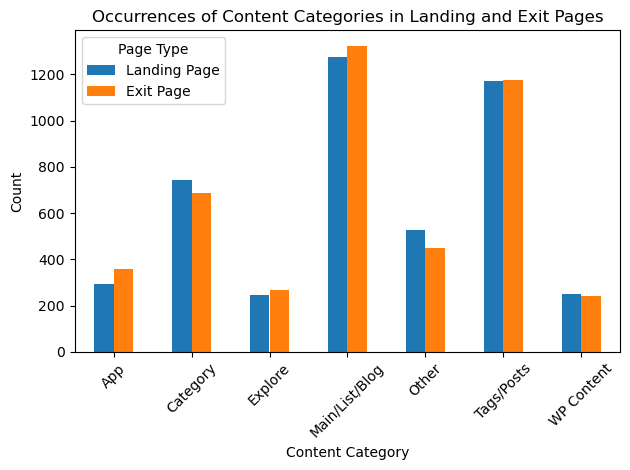

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_new is your DataFrame containing the specified filters

# Function to extract content category from page name
def extract_category(page):
    if 'category' in page:
        return 'Category'
    elif 'tags' in page or 'posts' in page:
        return 'Tags/Posts'
    elif 'main' in page or 'list' in page or 'blog' in page:
        return 'Main/List/Blog'
    elif 'app' in page:
        return 'App'
    elif 'explore' in page:
        return 'Explore'
    elif 'wp-content' in page:
        return 'WP Content'
    else:
        return 'Other'

# Apply function to landing_page and exit_page in data_new
data_new['landing_category'] = data_new['landing_page'].apply(extract_category)
data_new['exit_category'] = data_new['exit_page'].apply(extract_category)

# Count occurrences of each category
landing_counts = data_new['landing_category'].value_counts()
exit_counts = data_new['exit_category'].value_counts()

# Combine counts into a single DataFrame for plotting
counts_df = pd.DataFrame({'Landing Page': landing_counts, 'Exit Page': exit_counts}).fillna(0)

# Plotting
plt.figure(figsize=(12, 8))
counts_df.plot(kind='bar', stacked=False)
plt.title('Occurrences of Content Categories in Landing and Exit Pages')
plt.xlabel('Content Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Page Type')
plt.tight_layout()
plt.show()


The count for the Main/List/Blog on the landing page is: 1871
The count for the Main/List/Blog on the exit page is: 1899
The count for the tags/posts on the landing page is: 1327
The count for the tags/posts on the exit page is: 1339


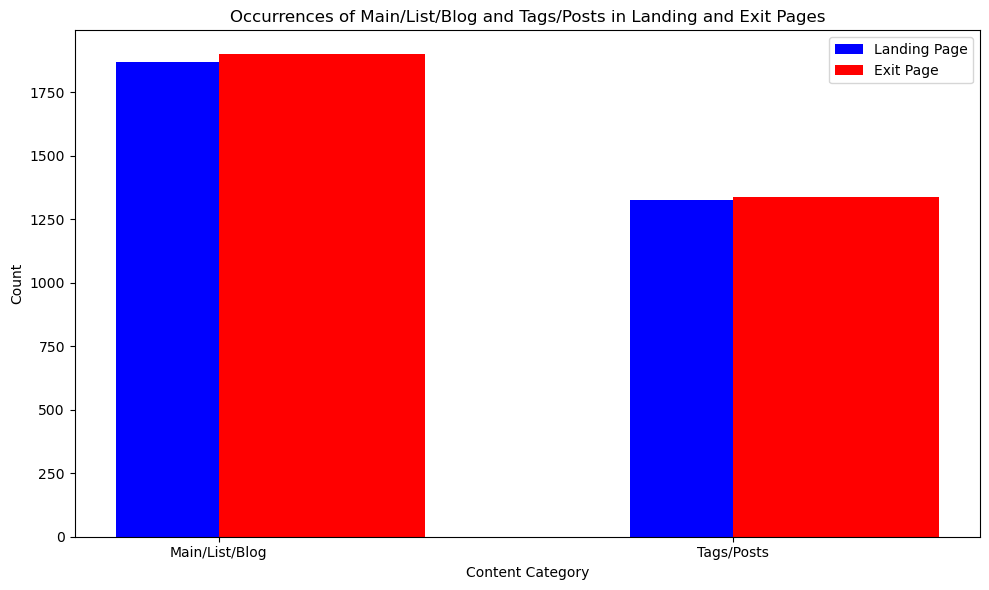

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_new is your DataFrame containing the specified filters
# Apply filters

# Filter rows where landing or exit page is 'Main/List/Blog' or 'Tags/Posts'
filtered_data = data_new[(data_new['landing_page'].str.contains('main|list|blog', case=False)) | 
                         (data_new['exit_page'].str.contains('main|list|blog', case=False)) |
                         (data_new['landing_page'].str.contains('tags|posts', case=False)) |
                         (data_new['exit_page'].str.contains('tags|posts', case=False))]

# Count occurrences of 'Main/List/Blog' and 'Tags/Posts' in landing and exit pages
landing_main_list_blog = filtered_data['landing_page'].str.contains('main|list|blog', case=False).sum()
print("The count for the Main/List/Blog on the landing page is:", landing_main_list_blog)
exit_main_list_blog = filtered_data['exit_page'].str.contains('main|list|blog', case=False).sum()
print("The count for the Main/List/Blog on the exit page is:", exit_main_list_blog)


landing_tags_posts = filtered_data['landing_page'].str.contains('tags|posts', case=False).sum()
print("The count for the tags/posts on the landing page is:",landing_tags_posts)
exit_tags_posts = filtered_data['exit_page'].str.contains('tags|posts', case=False).sum()
print("The count for the tags/posts on the exit page is:",exit_tags_posts)
# Plotting
categories = ['Main/List/Blog', 'Tags/Posts']
landing_counts = [landing_main_list_blog, landing_tags_posts]
exit_counts = [exit_main_list_blog, exit_tags_posts]

plt.figure(figsize=(10, 6))
bar_width = 0.4
index = range(len(categories))

plt.bar(index, landing_counts, width=bar_width, label='Landing Page', color='b', align='center')
plt.bar(index, exit_counts, width=bar_width, label='Exit Page', color='r', align='edge')

plt.xlabel('Content Category')
plt.ylabel('Count')
plt.title('Occurrences of Main/List/Blog and Tags/Posts in Landing and Exit Pages')
plt.xticks(index, categories)
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
#  Calculate total time spent on 'Main/List/Blog' and 'Tags/Posts' for North USA and West USA


# Assuming 'time_on_page' represents the time spent on a page
# Calculate total time spent on 'Main/List/Blog' and 'Tags/Posts' for North USA
north_usa_main_list_blog_time = filtered_data[(filtered_data['region'] == 'North_usa') & 
                                              (filtered_data['landing_page'].str.contains('main|list|blog', case=False) | 
                                               filtered_data['exit_page'].str.contains('main|list|blog', case=False))]['time_on_page'].sum()

north_usa_tags_posts_time = filtered_data[(filtered_data['region'] == 'North_usa') & 
                                          (filtered_data['landing_page'].str.contains('tags|posts', case=False) | 
                                           filtered_data['exit_page'].str.contains('tags|posts', case=False))]['time_on_page'].sum()

# Calculate total time spent on 'Main/List/Blog' and 'Tags/Posts' for West USA
west_usa_main_list_blog_time = filtered_data[(filtered_data['region'] == 'West_usa') & 
                                             (filtered_data['landing_page'].str.contains('main|list|blog', case=False) | 
                                              filtered_data['exit_page'].str.contains('main|list|blog', case=False))]['time_on_page'].sum()

west_usa_tags_posts_time = filtered_data[(filtered_data['region'] == 'West_usa') & 
                                         (filtered_data['landing_page'].str.contains('tags|posts', case=False) | 
                                          filtered_data['exit_page'].str.contains('tags|posts', case=False))]['time_on_page'].sum()

# Convert total times from seconds to minutes
total_time_main_list_blog_north_min = north_usa_main_list_blog_time / 60
total_time_tags_posts_north_min = north_usa_tags_posts_time / 60
total_time_main_list_blog_west_min = west_usa_main_list_blog_time / 60
total_time_tags_posts_west_min = west_usa_tags_posts_time / 60

# Print the results
print(f"North USA - Total Time Spent on Main/List/Blog: {total_time_main_list_blog_north_min:.2f} minutes")
print(f"North USA - Total Time Spent on Tags/Posts: {total_time_tags_posts_north_min:.2f} minutes")
print(f"West USA - Total Time Spent on Main/List/Blog: {total_time_main_list_blog_west_min:.2f} minutes")
print(f"West USA - Total Time Spent on Tags/Posts: {total_time_tags_posts_west_min:.2f} minutes")


North USA - Total Time Spent on Main/List/Blog: 59.47 minutes
North USA - Total Time Spent on Tags/Posts: 46.07 minutes
West USA - Total Time Spent on Main/List/Blog: 76.07 minutes
West USA - Total Time Spent on Tags/Posts: 57.27 minutes


In [63]:
data_new.columns


Index(['user_id', 'age', 'gender', 'country', 'city', 'session_id',
       'visit_date', 'visit_time', 'landing_page', 'exit_page',
       'page_load_time', 'event_type', 'product_viewed', 'product_category',
       'cart_additions', 'purchases', 'revenue', 'discount_code',
       'referral_url', 'new_vs_returning', 'time_on_page', 'scroll_depth',
       'clicks', 'source', 'device', 'browser', 'pageviews', 'sessions',
       'avg_session_duration', 'bounce_rate', 'pages_per_session',
       'conversion_rate', 'region', 'North_usa', 'South_usa', 'West_usa',
       'East_usa', 'gender_encoded', 'age_range', 'landing_category',
       'exit_category'],
      dtype='object')

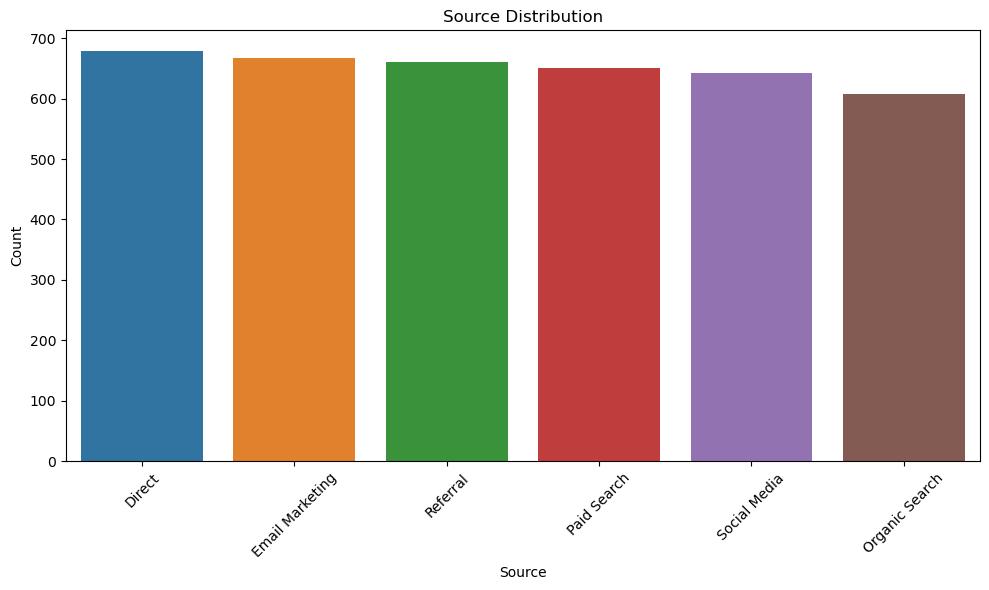

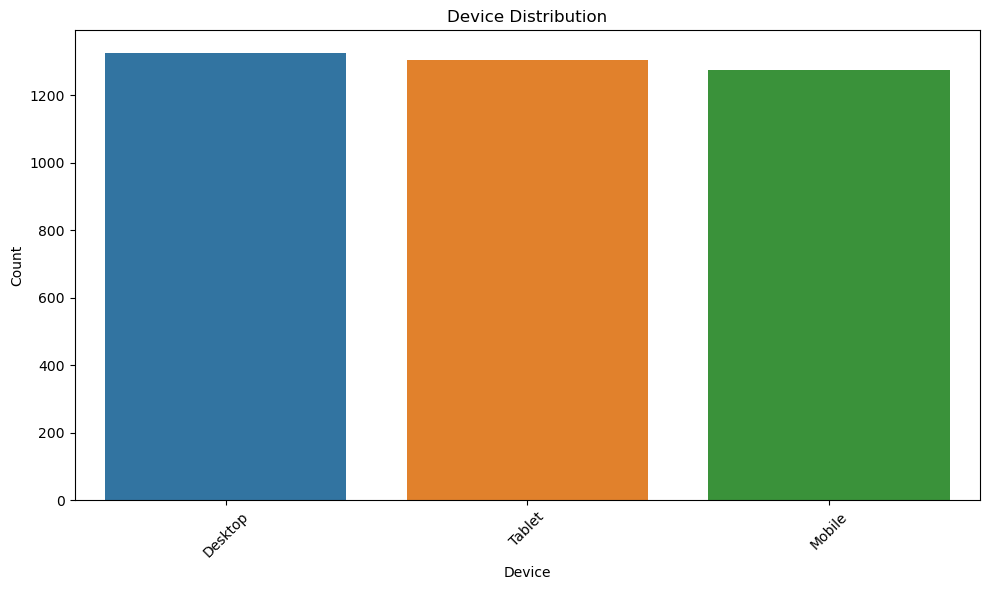

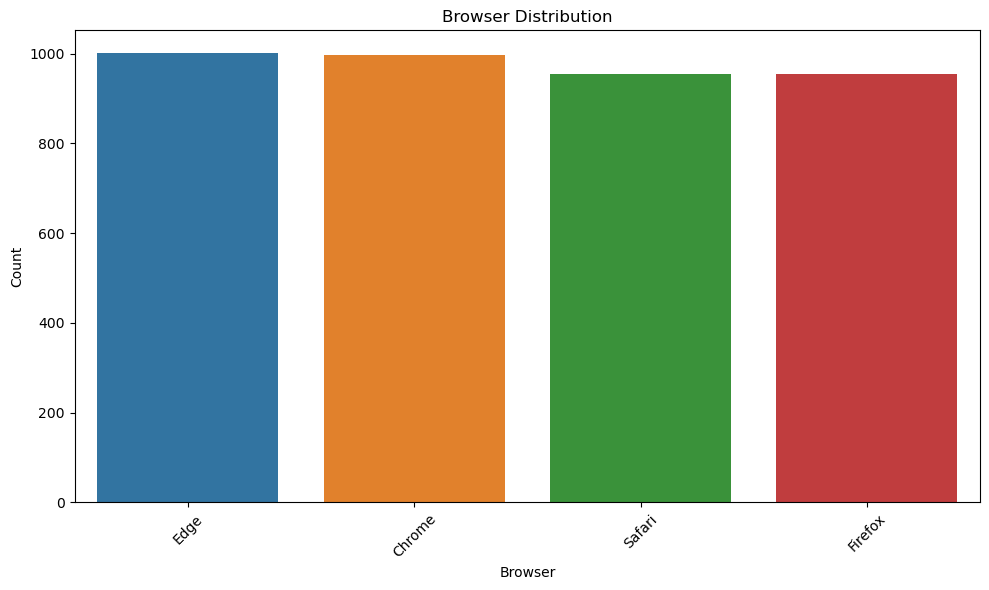

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming filtered_data already contains the filtered DataFrame with appropriate filters applied

# Calculating the required metrics
clicks = filtered_data['clicks'].sum()
avg_scroll_depth = filtered_data['scroll_depth'].mean()
source_distribution = filtered_data['source'].value_counts()
device_distribution = filtered_data['device'].value_counts()
browser_distribution = filtered_data['browser'].value_counts()
total_pageviews = filtered_data['pageviews'].sum()
avg_bounce_rate = filtered_data['bounce_rate'].mean()
avg_pages_per_session = filtered_data['pages_per_session'].mean()
avg_conversion_rate = filtered_data['conversion_rate'].mean()

# Visualization

# Plotting Source Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=source_distribution.index, y=source_distribution.values)
plt.title('Source Distribution')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Device Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=device_distribution.index, y=device_distribution.values)
plt.title('Device Distribution')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Browser Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=browser_distribution.index, y=browser_distribution.values)
plt.title('Browser Distribution')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [55]:
data_new.columns


Index(['user_id', 'age', 'gender', 'country', 'city', 'session_id',
       'visit_date', 'visit_time', 'landing_page', 'exit_page',
       'page_load_time', 'event_type', 'product_viewed', 'product_category',
       'cart_additions', 'purchases', 'revenue', 'discount_code',
       'referral_url', 'new_vs_returning', 'time_on_page', 'scroll_depth',
       'clicks', 'source', 'device', 'browser', 'pageviews', 'sessions',
       'avg_session_duration', 'bounce_rate', 'pages_per_session',
       'conversion_rate', 'region', 'North_usa', 'South_usa', 'West_usa',
       'East_usa', 'gender_encoded', 'age_range', 'landing_category',
       'exit_category'],
      dtype='object')

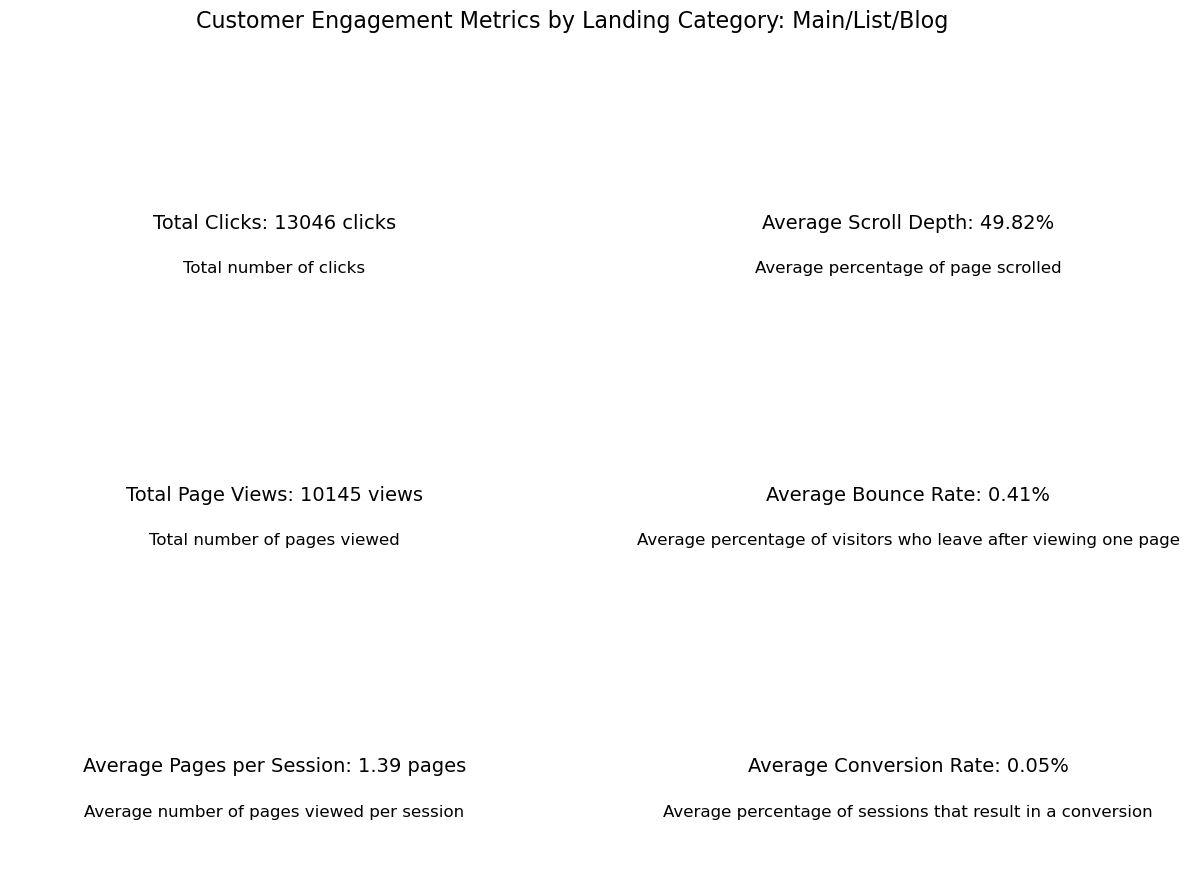

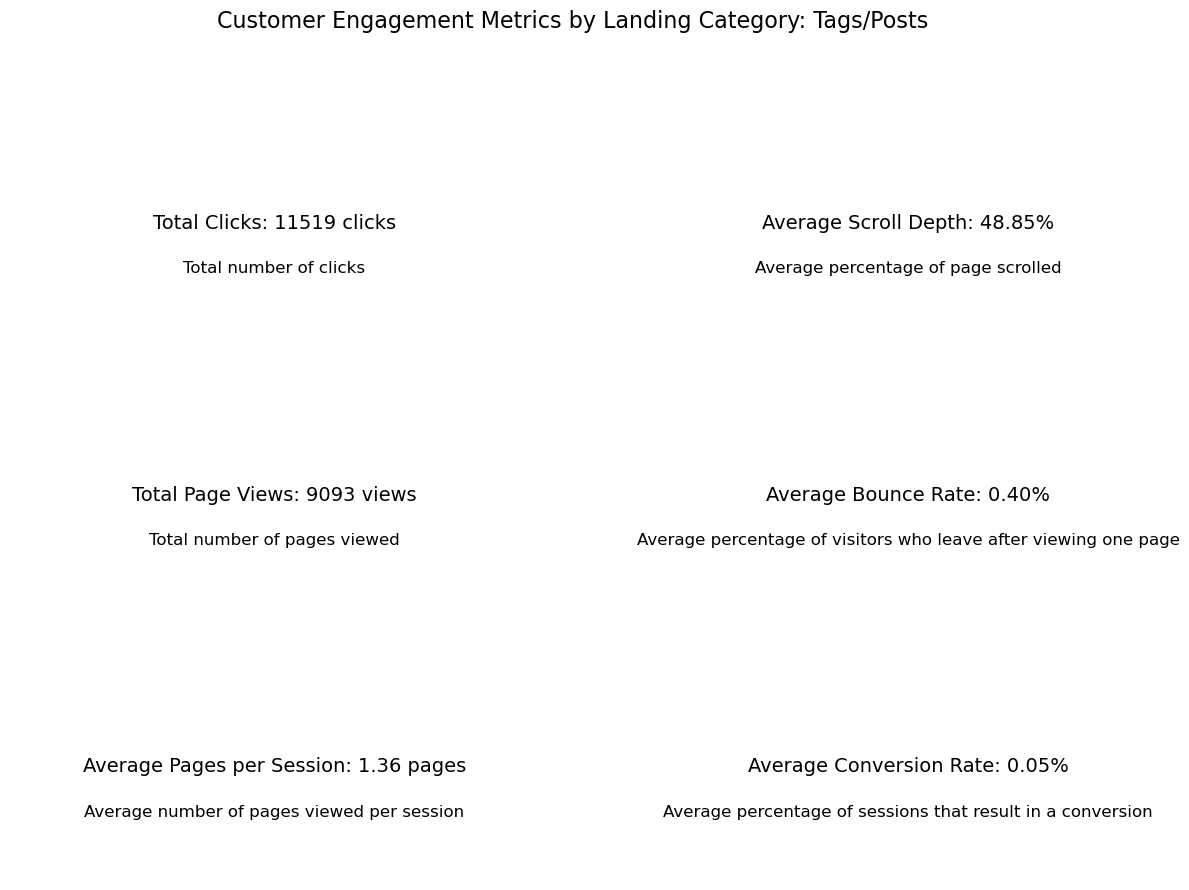

In [65]:
import matplotlib.pyplot as plt

# Assuming data_new is your DataFrame
# Filter data based on landing_category
main_list_blog = data_new[data_new['landing_category'] == 'Main/List/Blog']
tags_posts = data_new[data_new['landing_category'] == 'Tags/Posts']

# Calculate metrics for Main/List/Blog
clicks_main = main_list_blog['clicks'].sum()
avg_scroll_depth_main = main_list_blog['scroll_depth'].mean()
total_pageviews_main = main_list_blog['pageviews'].sum()
avg_bounce_rate_main = main_list_blog['bounce_rate'].mean()
avg_pages_per_session_main = main_list_blog['pages_per_session'].mean()
avg_conversion_rate_main = main_list_blog['conversion_rate'].mean()

# Calculate metrics for Tags/Posts
clicks_tags = tags_posts['clicks'].sum()
avg_scroll_depth_tags = tags_posts['scroll_depth'].mean()
total_pageviews_tags = tags_posts['pageviews'].sum()
avg_bounce_rate_tags = tags_posts['bounce_rate'].mean()
avg_pages_per_session_tags = tags_posts['pages_per_session'].mean()
avg_conversion_rate_tags = tags_posts['conversion_rate'].mean()

# Displaying the single value metrics in a visually appealing manner
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Customer Engagement Metrics by Landing Category: Main/List/Blog', fontsize=16)

# Main/List/Blog metrics
# Total Clicks
axs[0, 0].text(0.5, 0.5, f'Total Clicks: {clicks_main} clicks', fontsize=14, ha='center', va='center')
axs[0, 0].axis('off')
axs[0, 0].text(0.5, 0.3, "Total number of clicks", fontsize=12, ha='center', va='center')

# Average Scroll Depth
axs[0, 1].text(0.5, 0.5, f'Average Scroll Depth: {avg_scroll_depth_main:.2f}%', fontsize=14, ha='center', va='center')
axs[0, 1].axis('off')
axs[0, 1].text(0.5, 0.3, "Average percentage of page scrolled", fontsize=12, ha='center', va='center')

# Total Page Views
axs[1, 0].text(0.5, 0.5, f'Total Page Views: {total_pageviews_main} views', fontsize=14, ha='center', va='center')
axs[1, 0].axis('off')
axs[1, 0].text(0.5, 0.3, "Total number of pages viewed", fontsize=12, ha='center', va='center')

# Average Bounce Rate
axs[1, 1].text(0.5, 0.5, f'Average Bounce Rate: {avg_bounce_rate_main:.2f}%', fontsize=14, ha='center', va='center')
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.3, "Average percentage of visitors who leave after viewing one page", fontsize=12, ha='center', va='center')

# Average Pages per Session
axs[2, 0].text(0.5, 0.5, f'Average Pages per Session: {avg_pages_per_session_main:.2f} pages', fontsize=14, ha='center', va='center')
axs[2, 0].axis('off')
axs[2, 0].text(0.5, 0.3, "Average number of pages viewed per session", fontsize=12, ha='center', va='center')

# Average Conversion Rate
axs[2, 1].text(0.5, 0.5, f'Average Conversion Rate: {avg_conversion_rate_main:.2f}%', fontsize=14, ha='center', va='center')
axs[2, 1].axis('off')
axs[2, 1].text(0.5, 0.3, "Average percentage of sessions that result in a conversion", fontsize=12, ha='center', va='center')

plt.show()

# Create a second plot for Tags/Posts
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Customer Engagement Metrics by Landing Category: Tags/Posts', fontsize=16)

# Tags/Posts metrics
# Total Clicks
axs[0, 0].text(0.5, 0.5, f'Total Clicks: {clicks_tags} clicks', fontsize=14, ha='center', va='center')
axs[0, 0].axis('off')
axs[0, 0].text(0.5, 0.3, "Total number of clicks", fontsize=12, ha='center', va='center')

# Average Scroll Depth
axs[0, 1].text(0.5, 0.5, f'Average Scroll Depth: {avg_scroll_depth_tags:.2f}%', fontsize=14, ha='center', va='center')
axs[0, 1].axis('off')
axs[0, 1].text(0.5, 0.3, "Average percentage of page scrolled", fontsize=12, ha='center', va='center')

# Total Page Views
axs[1, 0].text(0.5, 0.5, f'Total Page Views: {total_pageviews_tags} views', fontsize=14, ha='center', va='center')
axs[1, 0].axis('off')
axs[1, 0].text(0.5, 0.3, "Total number of pages viewed", fontsize=12, ha='center', va='center')

# Average Bounce Rate
axs[1, 1].text(0.5, 0.5, f'Average Bounce Rate: {avg_bounce_rate_tags:.2f}%', fontsize=14, ha='center', va='center')
axs[1, 1].axis('off')
axs[1, 1].text(0.5, 0.3, "Average percentage of visitors who leave after viewing one page", fontsize=12, ha='center', va='center')

# Average Pages per Session
axs[2, 0].text(0.5, 0.5, f'Average Pages per Session: {avg_pages_per_session_tags:.2f} pages', fontsize=14, ha='center', va='center')
axs[2, 0].axis('off')
axs[2, 0].text(0.5, 0.3, "Average number of pages viewed per session", fontsize=12, ha='center', va='center')

# Average Conversion Rate
axs[2, 1].text(0.5, 0.5, f'Average Conversion Rate: {avg_conversion_rate_tags:.2f}%', fontsize=14, ha='center', va='center')
axs[2, 1].axis('off')
axs[2, 1].text(0.5, 0.3, "Average percentage of sessions that result in a conversion", fontsize=12, ha='center', va='center')

plt.show()


In [57]:
data_new['product_viewed'].unique()

array(['Swimwear', 'Shorts', 'Accessories', 'Hats', 'Skirts', 'Dresses',
       'Pants', 'Socks', 'T-Shirts', 'Underwear', 'Shoes', 'Jackets',
       'Sweaters', 'Jeans', 'Bags'], dtype=object)

product_viewed
Pants       336
Sweaters    330
Shorts      324
T-Shirts    312
Shoes       312
Name: count, dtype: int64


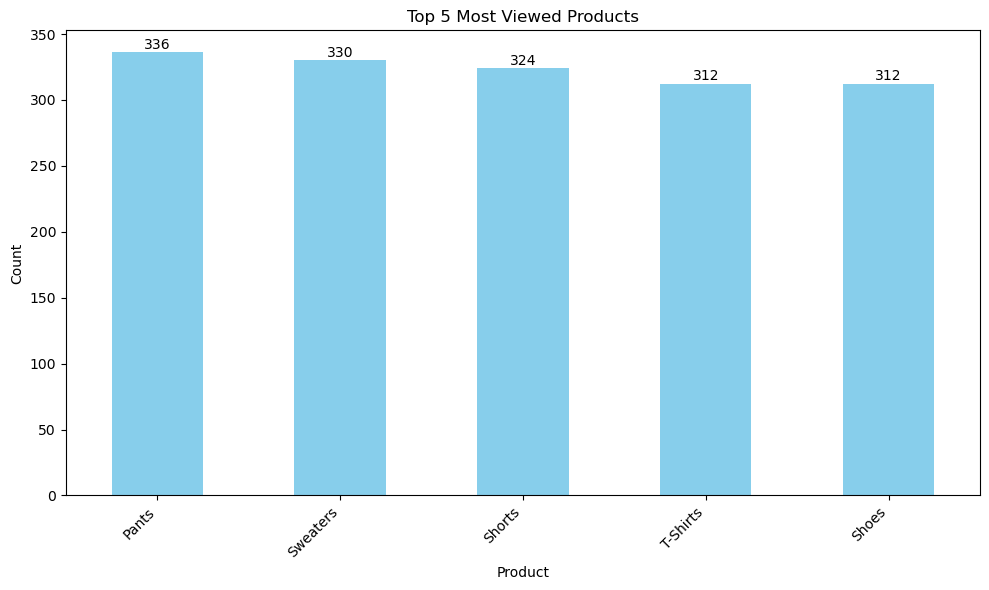

In [73]:

# Count occurrences of each product_viewed
product_counts = data_new['product_viewed'].value_counts()

# Select top 5 most viewed products
top_5_products = product_counts.head(5)
print(top_5_products)
# Plotting
plt.figure(figsize=(10, 6))
top_5_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Viewed Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Displaying the numbers on top of each bar
for i, count in enumerate(top_5_products):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

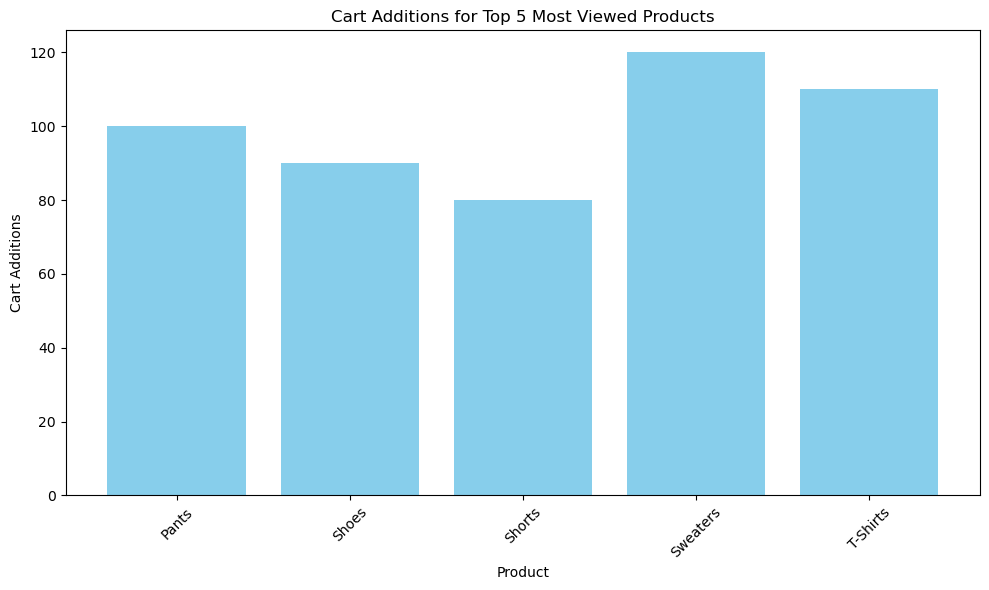

In [107]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the top 5 most viewed products based on your provided counts
top_5_products = ['Pants', 'Sweaters', 'Shorts', 'T-Shirts', 'Shoes']

# Filter data for the top 5 products
top_5_data = df[df['product_viewed'].isin(top_5_products)]

# Count cart additions for each product in the top 5
cart_additions_count = top_5_data.groupby('product_viewed')['cart_additions'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(cart_additions_count['product_viewed'], cart_additions_count['cart_additions'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Cart Additions')
plt.title('Cart Additions for Top 5 Most Viewed Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Sweaters and T-shirts are the mostly added to the cart products

In [86]:
import pandas as pd

# Assuming 'data_new' is your DataFrame containing the relevant columns including 'new_vs_returning' and 'purchases'

# Group by 'new_vs_returning' and sum the 'purchases' column
purchase_summary = data_new.groupby('new_vs_returning')['purchases'].sum().reset_index()

# Print the summary
print(purchase_summary)

# Extract the number of purchases for new and returning customers
new_customers_purchases = purchase_summary.loc[purchase_summary['new_vs_returning'] == 'New', 'purchases'].values[0]
returning_customers_purchases = purchase_summary.loc[purchase_summary['new_vs_returning'] == 'Returning', 'purchases'].values[0]

# Print the results
print(f"New Customers Purchases: {new_customers_purchases}")
print(f"Returning Customers Purchases: {returning_customers_purchases}")


  new_vs_returning  purchases
0              New       3299
1        Returning       3332
New Customers Purchases: 3299
Returning Customers Purchases: 3332


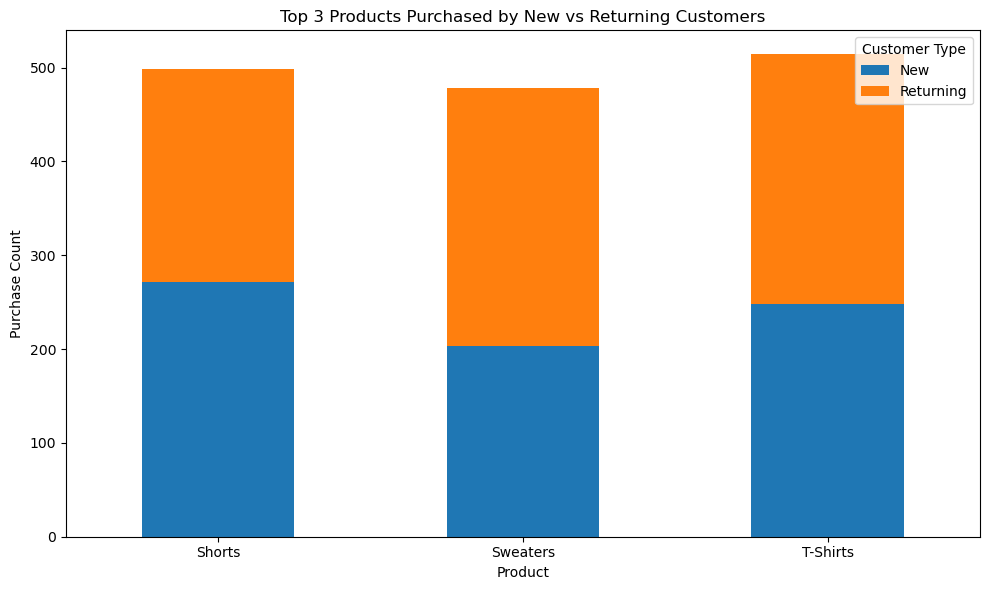

In [87]:

# Step 1: Determine top 3 products bought by both new and returning customers
top_3_products = data_new.groupby('product_viewed')['purchases'].sum().nlargest(3).index

# Step 2: Filter data for these top 3 products
top_3_data = data_new[data_new['product_viewed'].isin(top_3_products)]

# Step 3: Group by product and customer type to get purchase counts
purchase_counts = top_3_data.groupby(['product_viewed', 'new_vs_returning'])['purchases'].sum().unstack(fill_value=0)

# Step 4: Plotting
purchase_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 3 Products Purchased by New vs Returning Customers')
plt.xlabel('Product')
plt.ylabel('Purchase Count')
plt.xticks(rotation=0)
plt.legend(title='Customer Type', loc='upper right')
plt.tight_layout()
plt.show()



Shorts, Sweaters and T-shirts were mostly bought 

C:\Users\vaishnavi\AppData\Local\Temp\ipykernel_35952\992168479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['visit_date'] = pd.to_datetime(data_new['visit_date'])
C:\Users\vaishnavi\AppData\Local\Temp\ipykernel_35952\992168479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['quarter_of_month'] = data_new['visit_date'].dt.day // 8 + 1


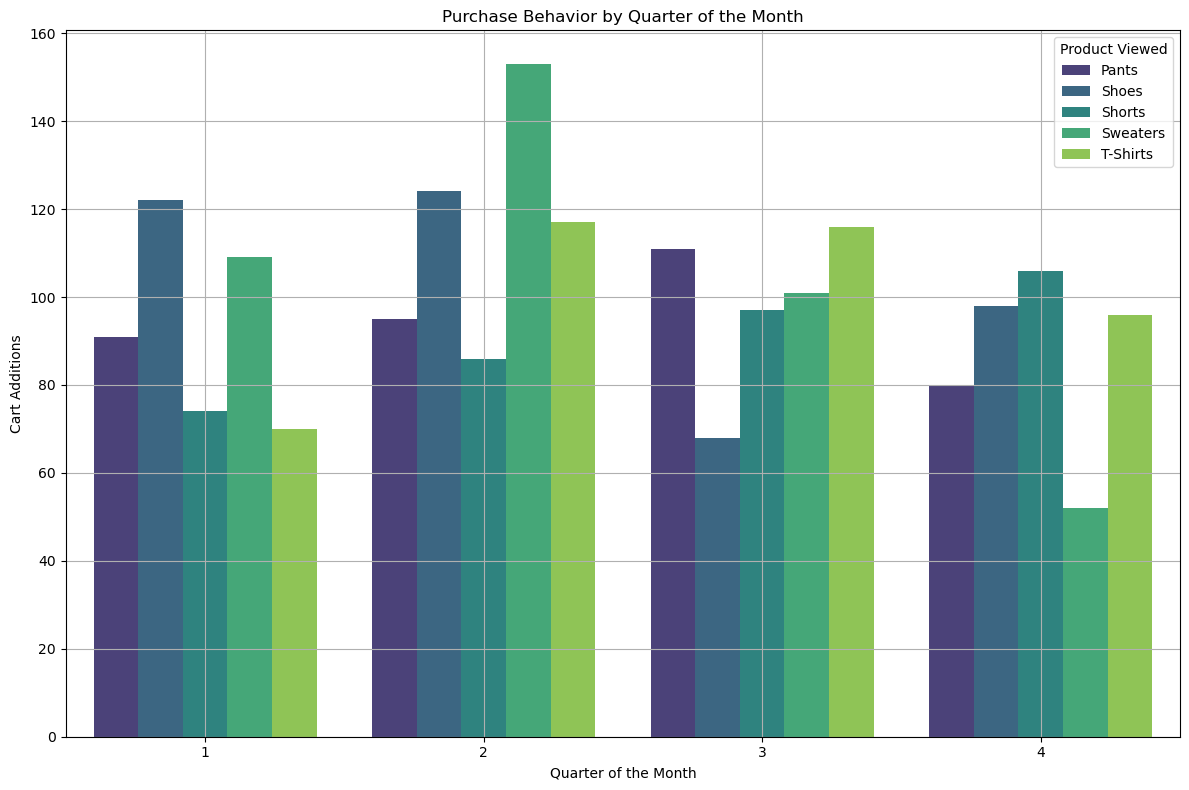

In [103]:

# Step 1: Convert visit_date to datetime format and extract quarter of the month
data_new['visit_date'] = pd.to_datetime(data_new['visit_date'])
data_new['quarter_of_month'] = data_new['visit_date'].dt.day // 8 + 1

# Step 2: Determine top 5 most viewed products
top_5_most_viewed = data_new['product_viewed'].value_counts().head(5).index.tolist()

# Step 3: Filter data for the top 5 most viewed products
top_5_viewed_data = data_new[data_new['product_viewed'].isin(top_5_most_viewed)]

# Step 4: Filter for regular returning customers
regular_returning = top_5_viewed_data[top_5_viewed_data['new_vs_returning'] == 'Returning']

# Step 5: Aggregate purchases by quarter of the month and product
quarterly_purchase_counts = regular_returning.groupby(['quarter_of_month', 'product_viewed'])['cart_additions'].sum().reset_index()

# Step 6: Visualize the purchase behavior for each product using a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=quarterly_purchase_counts, x='quarter_of_month', y='cart_additions', hue='product_viewed', palette='viridis')
plt.title('Purchase Behavior by Quarter of the Month')
plt.xlabel('Quarter of the Month')
plt.ylabel('Cart Additions')
plt.legend(title='Product Viewed')
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusion:

	North and West regions of the USA demonstrate higher customer engagement.

North region shows a concentration of customers aged 40-50, while the West region has more customers aged 20-30, with females being predominant.


'Main/List/Blog' pages are primary entry points, while 'Tags/Posts' pages are common exit points.

In West USA, customers spent 76.07 minutes on 'Main/List/Blog' and 57.27 minutes on 'Tags/Posts'.


Access to the website is evenly split among sources, predominantly through desktops using Edge and Chrome browsers.



'Main/List/Blog' pages attract more clicks, deeper scroll depth, and higher page views.


Top 5 most viewed and cart-added products include Pants, Sweaters, Shorts, T-Shirts, and Shoes.


Regular customers show consistent purchasing behavior, particularly favoring Shorts, Sweaters, and T-Shirts.